In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import IPython.display

n_mfcc = 15
window = "hamming"
hop_length = 256 #12ms
n_fft = 882 #40ms
pad = 87


In [2]:
audio_example = 'speech_commands_v0.01/left/563aa4e6_nohash_2.wav'

audio, sr = librosa.load(audio_example)
librosa.display.waveplot(audio, sr=sr)
IPython.display.Audio(audio, rate=sr)


In [3]:
import plotly.express as px
import plotly.graph_objects as go


img = go.Figure()

y = np.linspace(0, 1, sr, endpoint=False)
img.add_trace(go.Scatter(x=y, y=audio,
                    mode='lines',
                    name='Audio'))
shift = 0.31
x_window = np.linspace(0+shift, (n_fft/sr)+shift, n_fft, endpoint=False)
y_window = np.hamming(n_fft)

img.add_trace(go.Scatter(x=x_window, y=y_window,
                    mode='lines',
                    name='Hamming window'))

shift_hop = shift + 0.012
x_hop = np.linspace(0+shift_hop, (n_fft/sr)+shift_hop, n_fft, endpoint=False)
y_hop = np.hamming(n_fft)
img.add_trace(go.Scatter(x=x_hop, y=y_hop,
                    mode='lines',
                    name='Sliding window'))

img.update_layout(
    title="Speech Command - \"Left\"",
    title_y=0.8,
    xaxis_title="Time [s]",
    yaxis_title="Amplitude",
    width=700,
    height=400
    )

img.show()

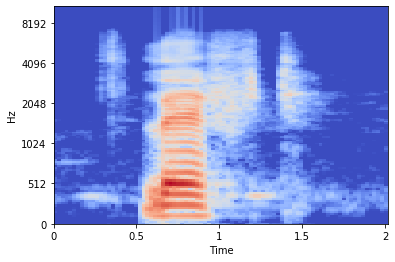

In [4]:
mel = librosa.feature.melspectrogram(y=audio, sr=sr, window=window, hop_length=hop_length, n_fft=n_fft)
librosa.display.specshow(librosa.power_to_db(mel), sr=sr, y_axis='mel', x_axis="time")


In [8]:
z = librosa.power_to_db(mel)
y = np.linspace(0, sr/2, num=z.shape[0] , endpoint=False)
x = np.linspace(0, 1, num=z.shape[1] , endpoint=False)

In [9]:
import plotly.graph_objects as go
import datetime
import numpy as np
np.random.seed(1)


fig = go.Figure(data=go.Heatmap(
        z=z,
        x=x,
        y=y,
        colorscale='Viridis',
        colorbar = dict(title='dB')))

fig.update_layout(
    title='Melspectrogram',
    title_y=0.8,
    xaxis_title="Time [s]",
    yaxis_title="Frequency [Hz]",
    width=700,
    height=400
)

fig.show()

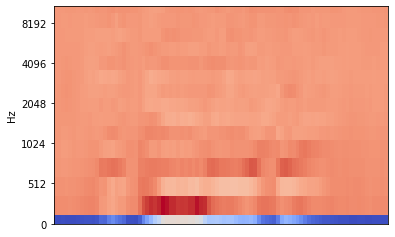

In [10]:
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, window=window, hop_length=hop_length, n_fft=n_fft)
librosa.display.specshow(mfccs,sr=sr, y_axis='mel')


In [11]:
mfccs.shape

(15, 87)

In [12]:
z = mfccs
y = np.linspace(0, z.shape[0], num=z.shape[0] , endpoint=False)
x = np.linspace(0, 1, num=z.shape[1] , endpoint=False)

In [14]:
import plotly.graph_objects as go
import datetime
import numpy as np
np.random.seed(1)


fig = go.Figure(data=go.Heatmap(
        z=z,
        x=x,
        y=y,
        colorscale='Viridis',
       ))

fig.update_layout(
    title='MFCC',
    title_y=0.8,
    xaxis_title="Time [s]",
    yaxis_title="",
    width=700,
    height=400
)
